In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Importing and Exploring ##

In [2]:
data= pd.read_csv("desktop/dataset1.csv")

In [3]:
dataset= data.copy()

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7000 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              6896 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(4), object(1

## Data Cleaning & Preparation##

### 1. Feature engineering (at least select 8 variables + Churn variable) ###

In [7]:
#droping useless and less important columns
data=data.drop(columns=["customerID","Partner","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"])


In [8]:
data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,NaN,No,NaN,No,DSL,Month-to-month,Electronic check,29.85,29.85,No
1,Male,NaN,No,34.0,Yes,DSL,One year,Mailed check,56.95,1889.50,No
2,Male,NaN,No,2.0,Yes,DSL,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,NaN,No,45.0,No,DSL,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,NaN,No,2.0,Yes,Fiber optic,Month-to-month,Electronic check,70.70,151.65,Yes


### 2. Convert total charges into categories (discretization) ###

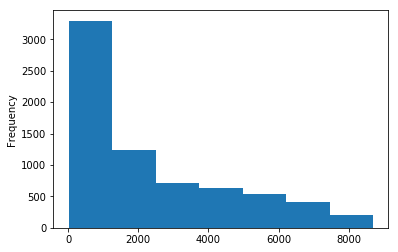

In [9]:
data["TotalCharges"].plot(kind="hist",bins=7)

In [10]:
(data["TotalCharges"]<1256).sum()

3295

In [11]:
#!!!! The following classification shows the ranges after processing the null values !!!!
#labels=["Cat1","Cat2","Cat3","Cat4","Cat5","Cat6","Cat7"]
#Cat1: <1256.853 = 3143
#Cat2: 1256.853 to 2494.836 = 1226
#Cat3: 2494.836 to 3732.829 = 708
#Cat4: 3732.829 to 4970.821 = 636
#Cat5: 4970.821 to 6208.814 = 537
#Cat6: 6208.814 to 7446.807 = 400
#Cat7: 7446.807 to 8684.800 = 207

In [12]:
data["TotalChargesCategory"]=pd.cut(data["TotalCharges"],7,labels=["Cat1","Cat2","Cat3","Cat4","Cat5","Cat6","Cat7"])

In [13]:
data["TotalChargesCategory"].value_counts()

Cat1    3295
Cat2    1243
Cat3     715
Cat4     640
Cat5     539
Cat6     403
Cat7     208
Name: TotalChargesCategory, dtype: int64

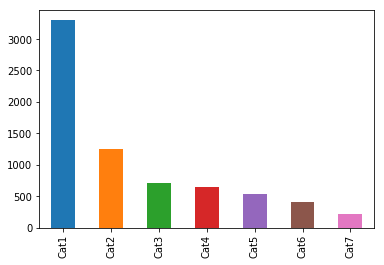

In [14]:
data["TotalChargesCategory"].value_counts().plot(kind="bar")

In [15]:
data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesCategory
0,Female,NaN,No,NaN,No,DSL,Month-to-month,Electronic check,29.85,29.85,No,Cat1
1,Male,NaN,No,34.0,Yes,DSL,One year,Mailed check,56.95,1889.50,No,Cat2
2,Male,NaN,No,2.0,Yes,DSL,Month-to-month,Mailed check,53.85,108.15,Yes,Cat1
3,Male,NaN,No,45.0,No,DSL,One year,Bank transfer (automatic),42.30,1840.75,No,Cat2
4,Female,NaN,No,2.0,Yes,Fiber optic,Month-to-month,Electronic check,70.70,151.65,Yes,Cat1


### 3. Missing values treatment ###

In [16]:
data.isna().sum()

gender                    0
SeniorCitizen            43
Dependents                0
tenure                  147
PhoneService              0
InternetService           0
Contract                  0
PaymentMethod             0
MonthlyCharges            0
TotalCharges              0
Churn                     0
TotalChargesCategory      0
dtype: int64

In [17]:
data.dropna(inplace=True)    #missing values treatment

In [18]:
data.isna().sum()

gender                  0
SeniorCitizen           0
Dependents              0
tenure                  0
PhoneService            0
InternetService         0
Contract                0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
TotalChargesCategory    0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6857 entries, 30 to 7042
Data columns (total 12 columns):
gender                  6857 non-null object
SeniorCitizen           6857 non-null float64
Dependents              6857 non-null object
tenure                  6857 non-null float64
PhoneService            6857 non-null object
InternetService         6857 non-null object
Contract                6857 non-null object
PaymentMethod           6857 non-null object
MonthlyCharges          6857 non-null float64
TotalCharges            6857 non-null float64
Churn                   6857 non-null object
TotalChargesCategory    6857 non-null category
dtypes: category(1), float64(4), object(7)
memory usage: 649.9+ KB


In [20]:
data["TotalChargesCategory"].value_counts()

Cat1    3143
Cat2    1226
Cat3     708
Cat4     636
Cat5     537
Cat6     400
Cat7     207
Name: TotalChargesCategory, dtype: int64

In [21]:
data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesCategory
30,Female,1.0,No,71.0,Yes,Fiber optic,Two year,Credit card (automatic),96.35,6766.95,No,Cat6
31,Male,1.0,No,2.0,Yes,Fiber optic,Month-to-month,Credit card (automatic),95.50,181.65,No,Cat1
47,Female,0.0,No,2.0,Yes,Fiber optic,Month-to-month,Electronic check,80.65,144.15,Yes,Cat1
48,Male,0.0,No,52.0,Yes,DSL,Two year,Credit card (automatic),79.75,4217.80,No,Cat4
49,Female,0.0,Yes,69.0,Yes,DSL,Two year,Credit card (automatic),64.15,4254.10,No,Cat4


In [22]:
data["InternetService"].value_counts()

Fiber optic    3035
DSL            2347
No             1475
Name: InternetService, dtype: int64

In [23]:
data["Contract"].value_counts()

Month-to-month    3721
Two year          1677
One year          1459
Name: Contract, dtype: int64

In [24]:
data["PaymentMethod"].value_counts()

Electronic check             2292
Mailed check                 1534
Bank transfer (automatic)    1525
Credit card (automatic)      1506
Name: PaymentMethod, dtype: int64

In [25]:
dataframe= data.copy()

### 4. Label encoding###

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le= LabelEncoder()

In [28]:
#Categorical Features

cat_features= ["gender","SeniorCitizen","Dependents",
               "PhoneService", "InternetService","Contract",
               "PaymentMethod","Churn","TotalChargesCategory"]

In [29]:
#Numerical Features

num_features= ["tenure", "MonthlyCharges", "TotalCharges"]

In [30]:
data[cat_features]= data[cat_features].apply(le.fit_transform)

In [31]:
df=data.copy()

In [32]:
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesCategory
30,0,1,0,71.0,1,1,2,1,96.35,6766.95,0,5
31,1,1,0,2.0,1,1,0,1,95.50,181.65,0,0
47,0,0,0,2.0,1,1,0,2,80.65,144.15,1,0
48,1,0,0,52.0,1,0,2,1,79.75,4217.80,0,3
49,0,0,1,69.0,1,0,2,1,64.15,4254.10,0,3


### 5. Standardization ###
###### There are 3 columns containing numerical values that needs standarization #####

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
df[num_features]=StandardScaler().fit_transform(df[num_features])


In [35]:
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesCategory
30,0,1,0,1.556500,1,1,2,1,1.038248,1.959096,0,5
31,1,1,0,-1.272730,1,1,0,1,1.010004,-0.945968,0,0
47,0,0,0,-1.272730,1,1,0,2,0.516553,-0.962511,1,0
48,1,0,0,0.777437,1,0,2,1,0.486647,0.834554,0,3
49,0,0,1,1.474494,1,0,2,1,-0.031726,0.850568,0,3


# Relation between each variable and churn #

In [36]:
import seaborn as sns

In [37]:
data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesCategory
30,0,1,0,71.0,1,1,2,1,96.35,6766.95,0,5
31,1,1,0,2.0,1,1,0,1,95.50,181.65,0,0
47,0,0,0,2.0,1,1,0,2,80.65,144.15,1,0
48,1,0,0,52.0,1,0,2,1,79.75,4217.80,0,3
49,0,0,1,69.0,1,0,2,1,64.15,4254.10,0,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19fe2fd0>,
      dtype=object)

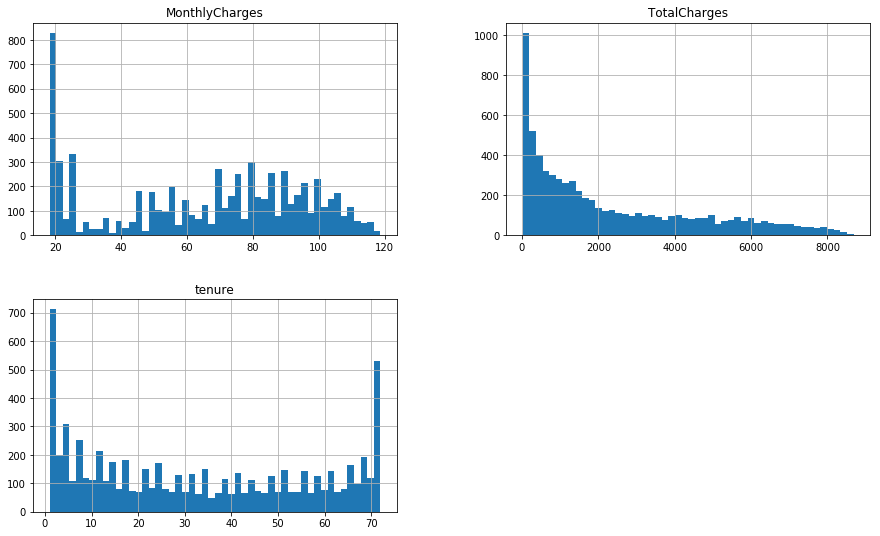

In [38]:
#Counting numerical features
data[num_features].hist(bins=50, figsize=(15, 9))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a19fe2eb8>,
      dtype=object)

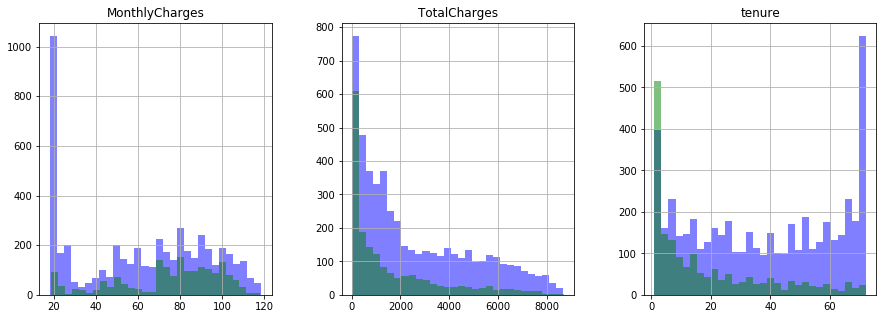

In [39]:
#comparing numerical features of churned and not churned customers
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
data[data.Churn == 0][num_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
data[data.Churn == 1][num_features].hist(bins=30, color="green", alpha=0.5, ax=ax)

Text(0.5, 1.0, 'Churned')

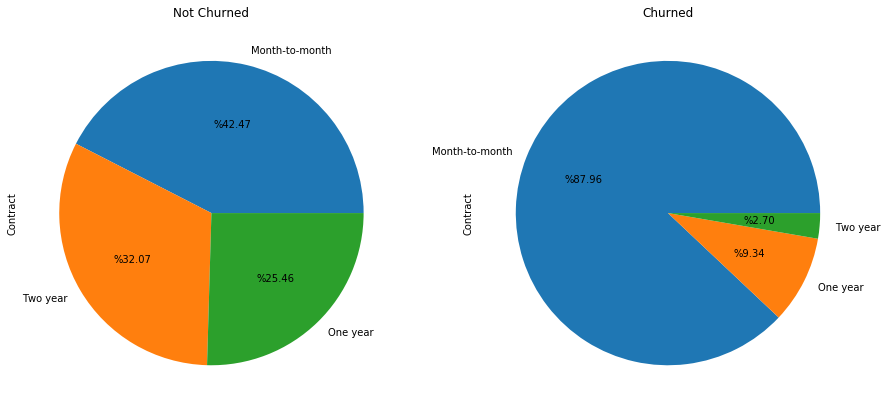

In [40]:
#comparing the percentage of 
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
dataframe[dataframe.Churn == "No"]["Contract"].value_counts().plot("pie", ax=ax[0],autopct="%%%.2f").set_title("Not Churned")
dataframe[dataframe.Churn == "Yes"]["Contract"].value_counts().plot("pie", ax=ax[1],autopct='%%%.2f').set_title("Churned")


# Relation between each variable and others #


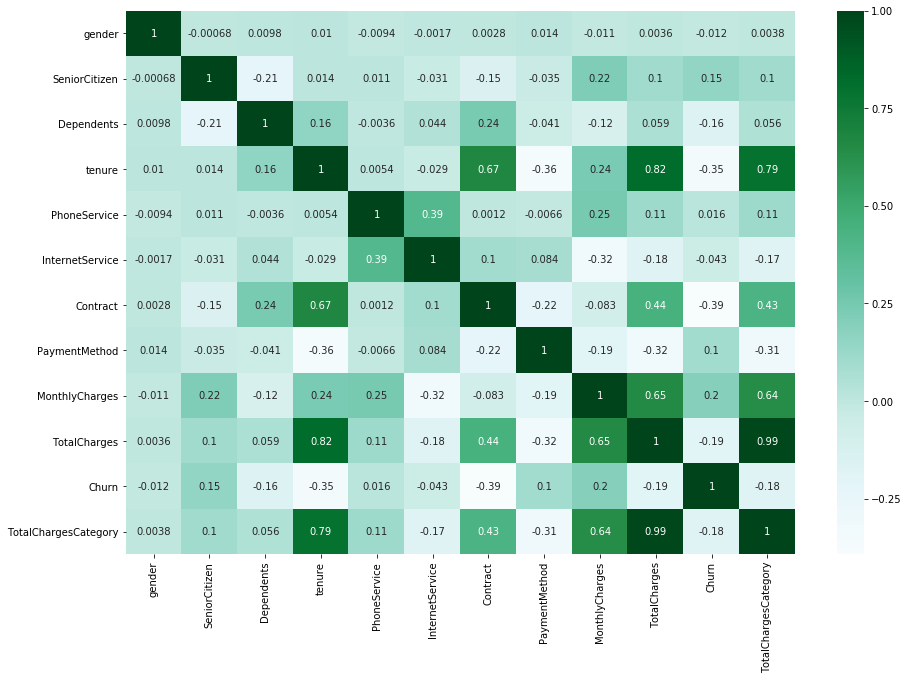

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='BuGn',annot = True)

# Obtaining answers from Data #

### Q1: How many male customers churned from our company?

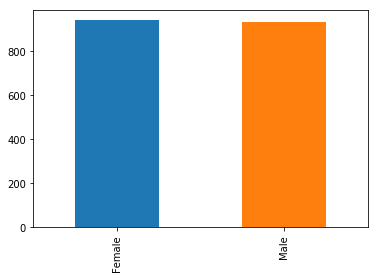

In [78]:
fig, ax= plt.subplots()
dataset[dataset.Churn == "Yes"]["gender"].value_counts().plot("bar")

In [164]:
C_Customers= len(dataset[(dataset["Churn"]== "Yes") & (dataset["gender"] == "Male")])

In [168]:
print("The number of churned customers is:",C_Customers)

The number of churned customers is: 930


### Q2: What is the ratio between males and females in our company?

In [77]:
dataset["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [79]:
Male= 3555
Female= 3488

In [128]:
#Ratio between males and females
Ratio_Gender= (Male/Female)

In [130]:
print("The ratio between males and females is {:1f}".format((Ratio_Gender)))

The ratio between males and females is 1.019209


### Q3: What is the ratio between churned and others in our company?

In [123]:
dataset["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [132]:
Churn= 1869
NonChurn= 5174

In [133]:
#Ratio between churn and nonchurn
Ratio_Churn= (Churn/NonChurn)

In [134]:
print("The ratio between churns and non-churns is {:1f}".format((Ratio_Churn)))

The ratio between churns and non-churns is 0.361229


### Q4: How many senior citizens churned from our company?

In [139]:
dataset["SeniorCitizen"].value_counts()

0.0    5858
1.0    1142
Name: SeniorCitizen, dtype: int64

In [155]:
C_Senior= len(dataset[(dataset["Churn"]== "Yes") & (dataset["SeniorCitizen"] == 1)])

In [169]:
print("The number of churned senior citizens is:",C_Senior)

The number of churned senior citizens is: 476


### Q5: What is the id of the biggest in total charges?

In [172]:
Max=data["TotalCharges"].max()

In [173]:
ID= data["TotalCharges"].idxmax()

In [174]:
print("The ID of the largest total charges is:", ID,"with a value of",Max,"US Dollars")

The ID of the largest total charges is: 4610 with a value of 8684.8 US Dollars


### Q6: What is the correlation between monthly charges and total charges?

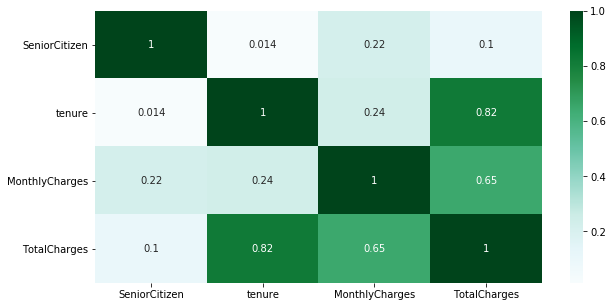

In [151]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),cmap='BuGn',annot = True)

In [154]:
M_T_Corr= dataset["MonthlyCharges"].corr(dataset["TotalCharges"])

In [178]:
print("The correlation between monthly charges and total charges is: {:1f}".format((M_T_Corr)))

The correlation between monthly charges and total charges is: 0.650468


### Q7: What is the average payment per month of all users?

In [179]:
AVG= dataset['MonthlyCharges'].mean()

In [184]:
print("The average payment per month from users= {:1f} US Dollars".format((AVG)))

The average payment per month from users= 64.761692 US Dollars
